# Análise  e Modelagem de Dados de Habitação

### Trabalho Realizado por:
- Bruno Monteiro Miranda nº 26014
- Daniel Aléxis Oliveira Pereira nº 26432
### Introdução
Neste projeto, foi realizada uma análise  e modelagem de dados utilizando um conjunto de dados de habitação na Califórnia. O objetivo principal foi explorar padrões nos dados, construir modelos preditivos, realizar clustering e aplicar técnicas de mineração de regras de associação.

### Estrutura do Projeto
O projeto está dividido nas seguintes etapas principais:

1. **Carregamento do Dataset**
   - Carregamento dos dados para serem trabalhados do dataset.

2. **Exploração de Dados**  
   - Análise estatística descritiva.
   - Visualização de distribuições e categorias.

3. **Pré-processamento de Dados**  
   - Tratamento de valores nulos.
   - Criação de novas features.
   - Escalonamento e codificação das variáveis.

4. **Divisão de Dados e Preparação**
   - Divisão de Dados em conjuntos de treino e teste.

5. **Modelagem Preditiva**  
   - Treino e avaliação de modelos de regressão (e.g., Regressão Linear, Árvores de Decisão, Random Forest).
   - Avaliação de métricas como R² e RMSE.

6. **Clustering**  
   - Análise do número ótimo de clusters (Método do Elbow e Silhueta).
   - Treino de um modelo K-Means.

7. **Mineração de Regras de Associação**  
   - Discretização de variáveis.
   - Aplicação do algoritmo Apriori para geração de regras.

8. **Classificação**  
   - Construção e avaliação de um modelo de classificação com base na variável `ocean_proximity`.

### Objetivo
O objetivo deste trabalho foi aplicar técnicas de análise de dados, machine learning e data mining para compreender melhor o conjunto de dados e obter insights úteis. Além disso, foram avaliadas abordagens para prever o valor médio das casas e identificar padrões.



In [3]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, root_mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori, association_rules

## Carregamento e Visualização Inicial dos Dados
Nesta secção, carregamos o dataset e exploramos suas características principais.


In [5]:
# Load the dataset
df = pd.read_csv("housing.txt")


## Análise Exploratória de Dados
Exploramos a distribuição dos dados numéricos e categóricos usando gráficos e estatísticas descritivas.


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

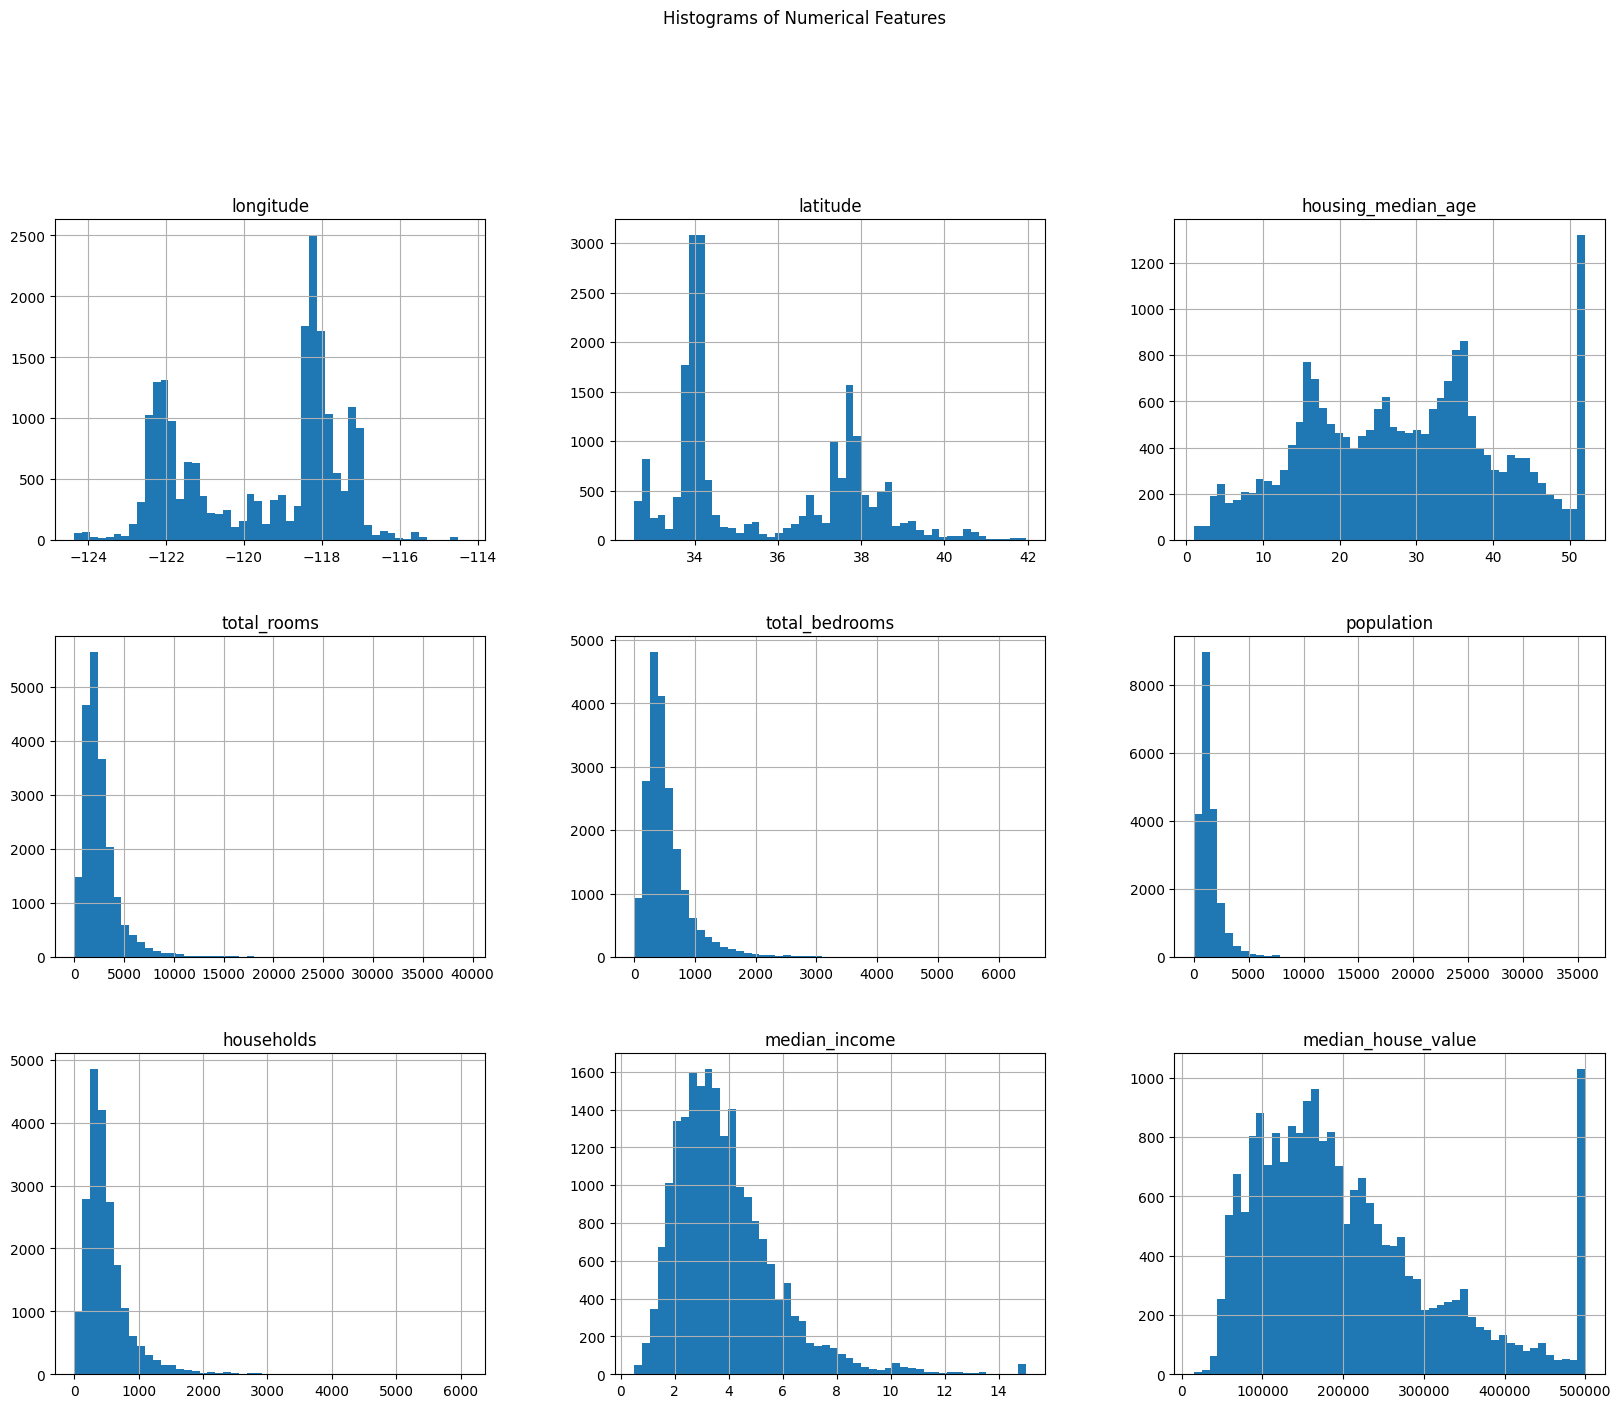

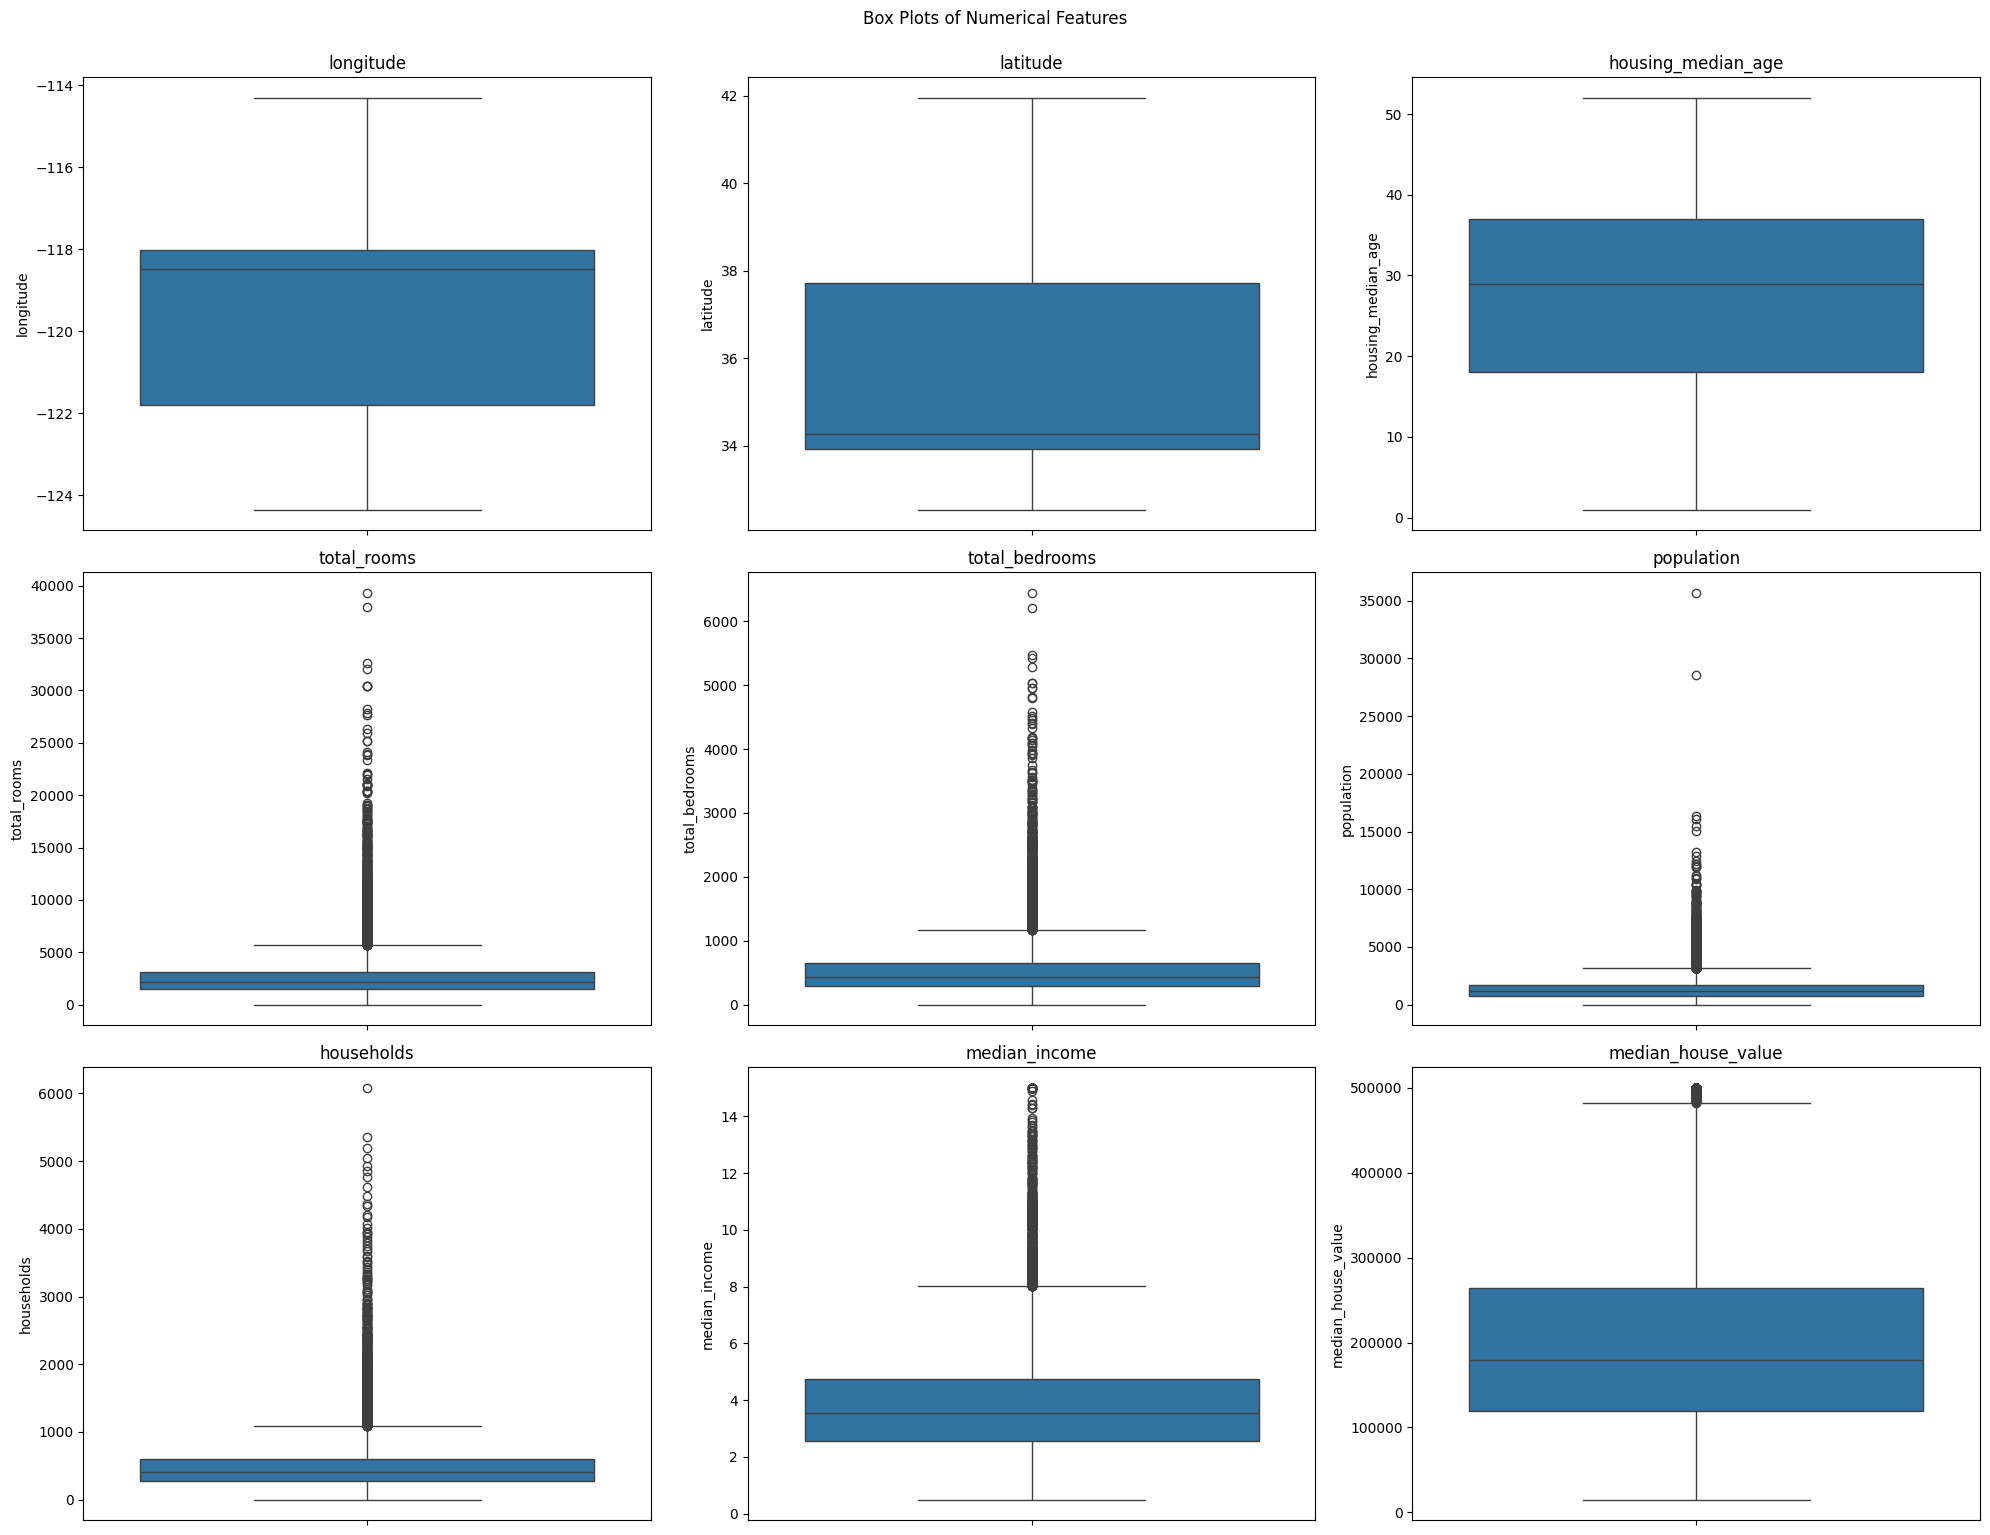

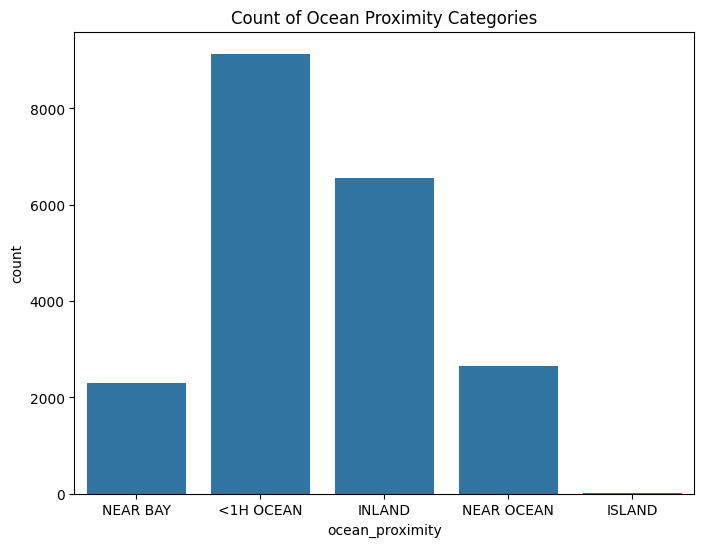

In [6]:
# 2. Descriptive Statistics and Visualization
print(df.describe())

# Histograms for numerical features
df.hist(bins=50, figsize=(20, 15))
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.show()

# Box plots for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.suptitle("Box Plots of Numerical Features", y=1.02)
plt.show()

# Count plot for the categorical feature
plt.figure(figsize=(8, 6))
sns.countplot(x='ocean_proximity', data=df)
plt.title("Count of Ocean Proximity Categories")
plt.show()


## Pré-Processamento dos Dados
Lidamos com valores ausentes, criamos novas features e aplicamos escalonamento e codificação.


In [7]:
# 3. Feature Engineering
df['rooms_per_household'] = df['total_rooms'] / df['households']

# OPTION 1: Remove rows with NaNs (if applicable)
df.dropna(inplace=True)

## Divisão de Dados e Preparação
Dividimos os dados em conjuntos de treino e teste, e aplicamos transformações como escalonamento e one-hot encoding.


In [8]:
# 4. Data Splitting
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Feature Scaling and One-Hot Encoding
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['ocean_proximity']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply preprocessing to training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


## Treinamento e Avaliação de Modelos
Treinamos diferentes modelos de regressão e avaliamos os seus desempenhos com métrica R² e RMSE.


In [9]:
# 6. Model Training (Linear Regression, Decision Tree, Random Forest, HistGradientBoostingRegressor)
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Hist Gradient Boosting": HistGradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 7. Model Evaluation (RMSE, R-squared)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"RMSE: {rmse}")
    print(f"R-squared: {r2}")
    print("-" * 30)

Model: Linear Regression
RMSE: 69381.80954995996
R-squared: 0.6479874327264508
------------------------------
Model: Decision Tree
RMSE: 67512.67463448211
R-squared: 0.6666982829980985
------------------------------
Model: Random Forest
RMSE: 48775.65652508991
R-squared: 0.8260304776459959
------------------------------
Model: Hist Gradient Boosting
RMSE: 48134.81517731563
R-squared: 0.8305718609206192
------------------------------


## Clustering com K-Means
Aplicamos clustering para agrupar as observações com base em suas características.


In [10]:
# --- Clustering (K-Means) ---
# 8. Determine optimal k using the Elbow method and Silhouette analysis
inertia = []
silhouette = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_train, kmeans.labels_))

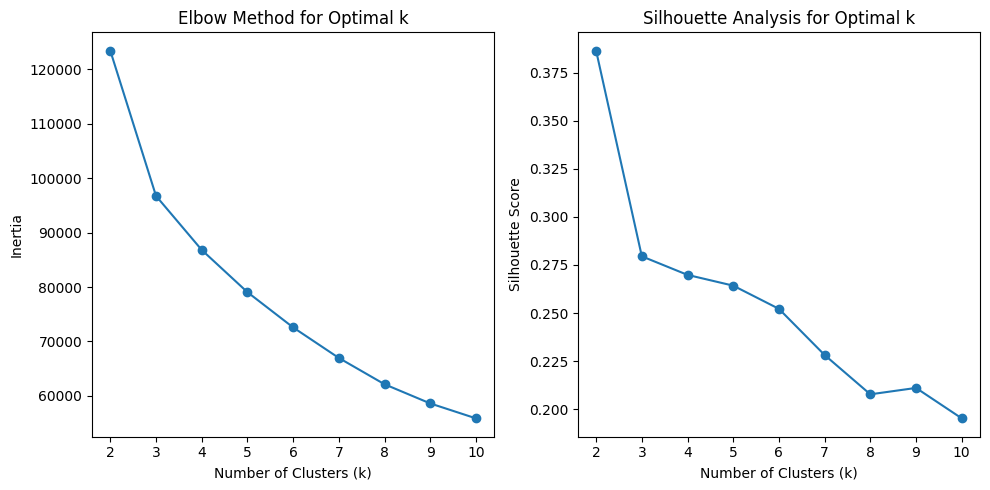

In [12]:
# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot Silhouette Analysis
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette, marker='o')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

# 9. Train K-Means with chosen k (e.g., k=5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_train)
cluster_labels = kmeans.labels_

## Mineração de Regras de Associação
Usamos o algoritmo Apriori para identificar padrões e regras frequentes nos dados discretizados.


In [ ]:
# --- Association Rule Mining (Apriori) ---

# 10. Discretize features for Apriori (example: using qcut for numerical features)
X_apriori = X.copy()
for col in numerical_features:
    X_apriori[col] = pd.qcut(X_apriori[col], q=4, duplicates='drop')

# Convert categorical features to string type before one-hot encoding
for col in categorical_features:
    X_apriori[col] = X_apriori[col].astype(str)

# Convert to one-hot format for Apriori
X_apriori = pd.get_dummies(X_apriori)

# 11. Apply Apriori algorithm
frequent_itemsets = apriori(X_apriori, min_support=0.1, use_colnames=True)

# 12. Generate association rules
num_transactions = len(df)  # Total rows in the original DataFrame
rules = association_rules(frequent_itemsets, num_transactions, metric="confidence", min_threshold=0.7)

# Display frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets.head())
print("\nAssociation Rules:")
print(rules.head())


Frequent Itemsets:
    support                        itemsets
0  0.250232  (longitude_(-124.351, -121.8])
1  0.251848   (longitude_(-121.8, -118.49])
2  0.248715  (longitude_(-118.49, -118.01])
3  0.249205  (longitude_(-118.01, -114.31])
4  0.251848      (latitude_(32.539, 33.93])

Association Rules:
                       antecedents                     consequents  \
0       (ocean_proximity_NEAR BAY)  (longitude_(-124.351, -121.8])   
1    (longitude_(-121.8, -118.49])        (ocean_proximity_INLAND)   
2   (longitude_(-118.49, -118.01])     (ocean_proximity_<1H OCEAN)   
3        (latitude_(33.93, 34.26])     (ocean_proximity_<1H OCEAN)   
4  (total_bedrooms_(0.999, 296.0])   (total_rooms_(1.999, 1450.0])   

   antecedent support  consequent support   support  confidence      lift  \
0            0.111095            0.250232  0.111095    1.000000  3.996284   
1            0.251848            0.317917  0.182890    0.726195  2.284228   
2            0.248715            0.442128  0.

## Classificação com Random Forest
Utilizamos Random Forest para prever a proximidade do oceano.



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1803
           1       0.99      0.98      0.99      1340
           2       0.00      0.00      0.00         2
           3       0.97      0.99      0.98       428
           4       0.96      0.92      0.94       514

    accuracy                           0.98      4087
   macro avg       0.78      0.78      0.78      4087
weighted avg       0.97      0.98      0.97      4087

Confusion Matrix:
[[1772   11    0    3   17]
 [  23 1316    0    1    0]
 [   0    0    0    0    2]
 [   0    0    0  425    3]
 [  32    0    0    9  473]]


c:\Users\Daniel Pereira\Desktop\Projetos\Aulas\IA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel Pereira\Desktop\Projetos\Aulas\IA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel Pereira\Desktop\Projetos\Aulas\IA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

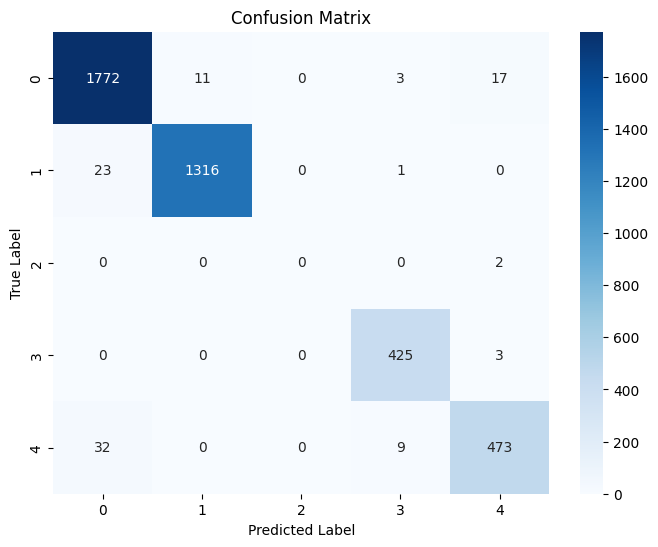

In [16]:
# 13. Prepare data for classification (using 'ocean_proximity' as target)

X_class = df.drop('ocean_proximity', axis=1)
y_class = df['ocean_proximity']

# Encode the target variable for classification
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class_encoded, test_size=0.2, random_state=42)

# Preprocess numerical features for classification
preprocessor_class = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ])

X_train_class = preprocessor_class.fit_transform(X_train_class)
X_test_class = preprocessor_class.transform(X_test_class)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

# Predict and evaluate
y_pred_class = rf_classifier.predict(X_test_class)
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_class))

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_class, y_pred_class), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



## Grafos Gerados

### Histogramas das Variáveis Numéricas

Mostra a distribuição das variáveis numéricas no conjunto de dados.

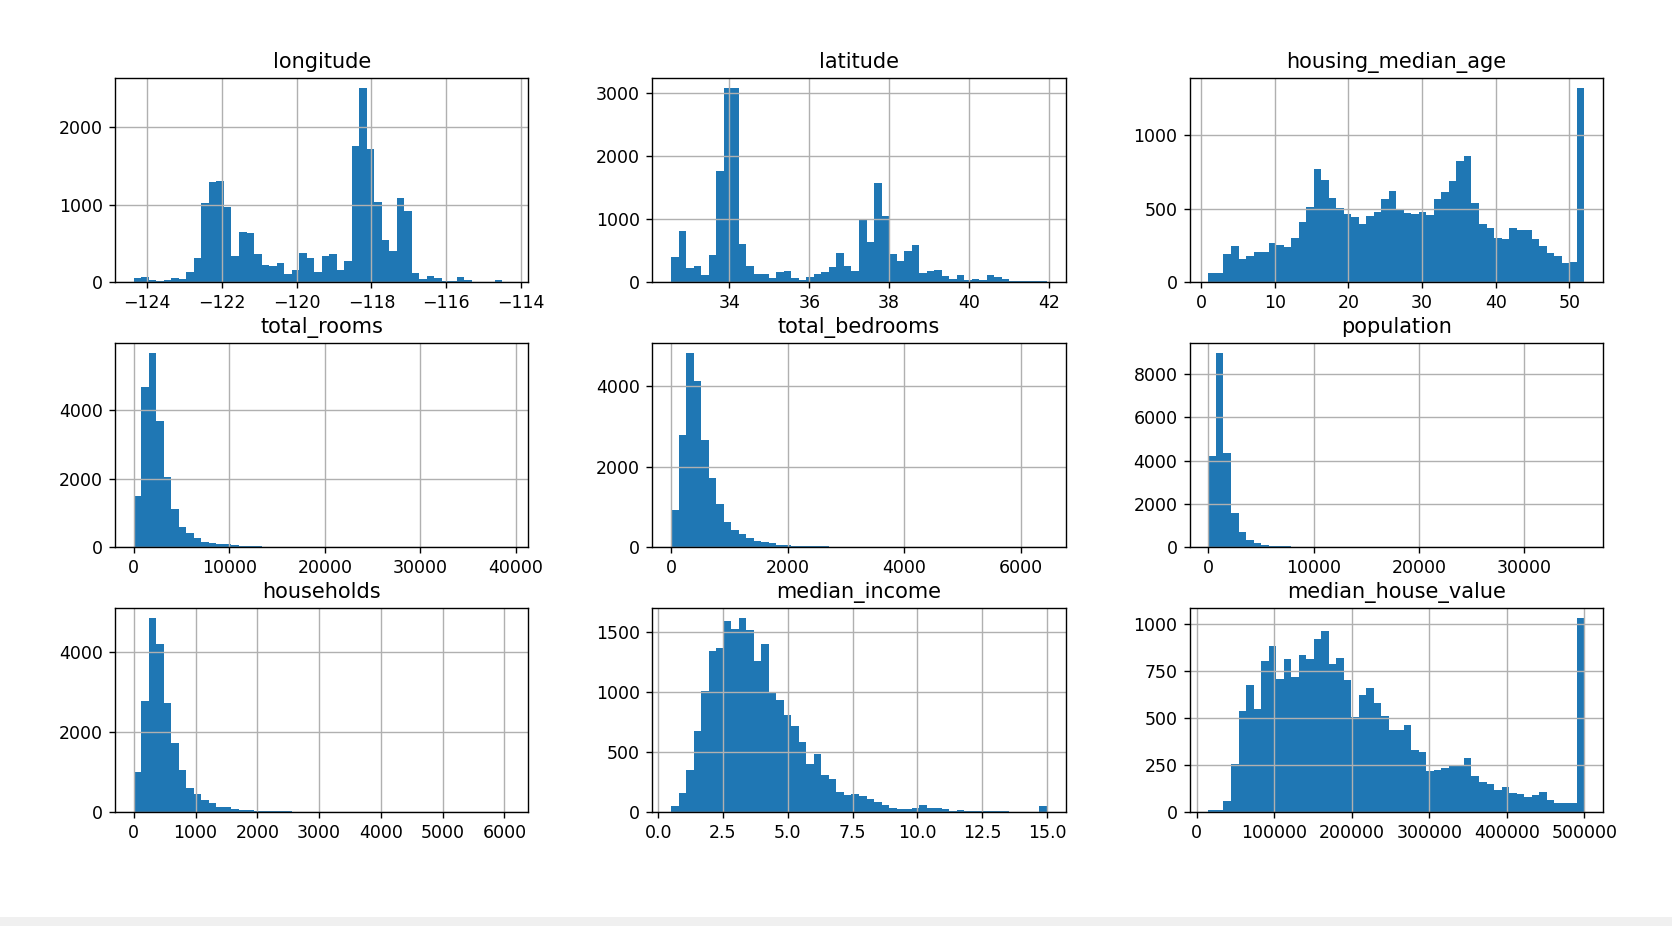

### Gráficos de Caixa das Variáveis Numéricas

Visualiza a dispersão e os outliers das variáveis numéricas.


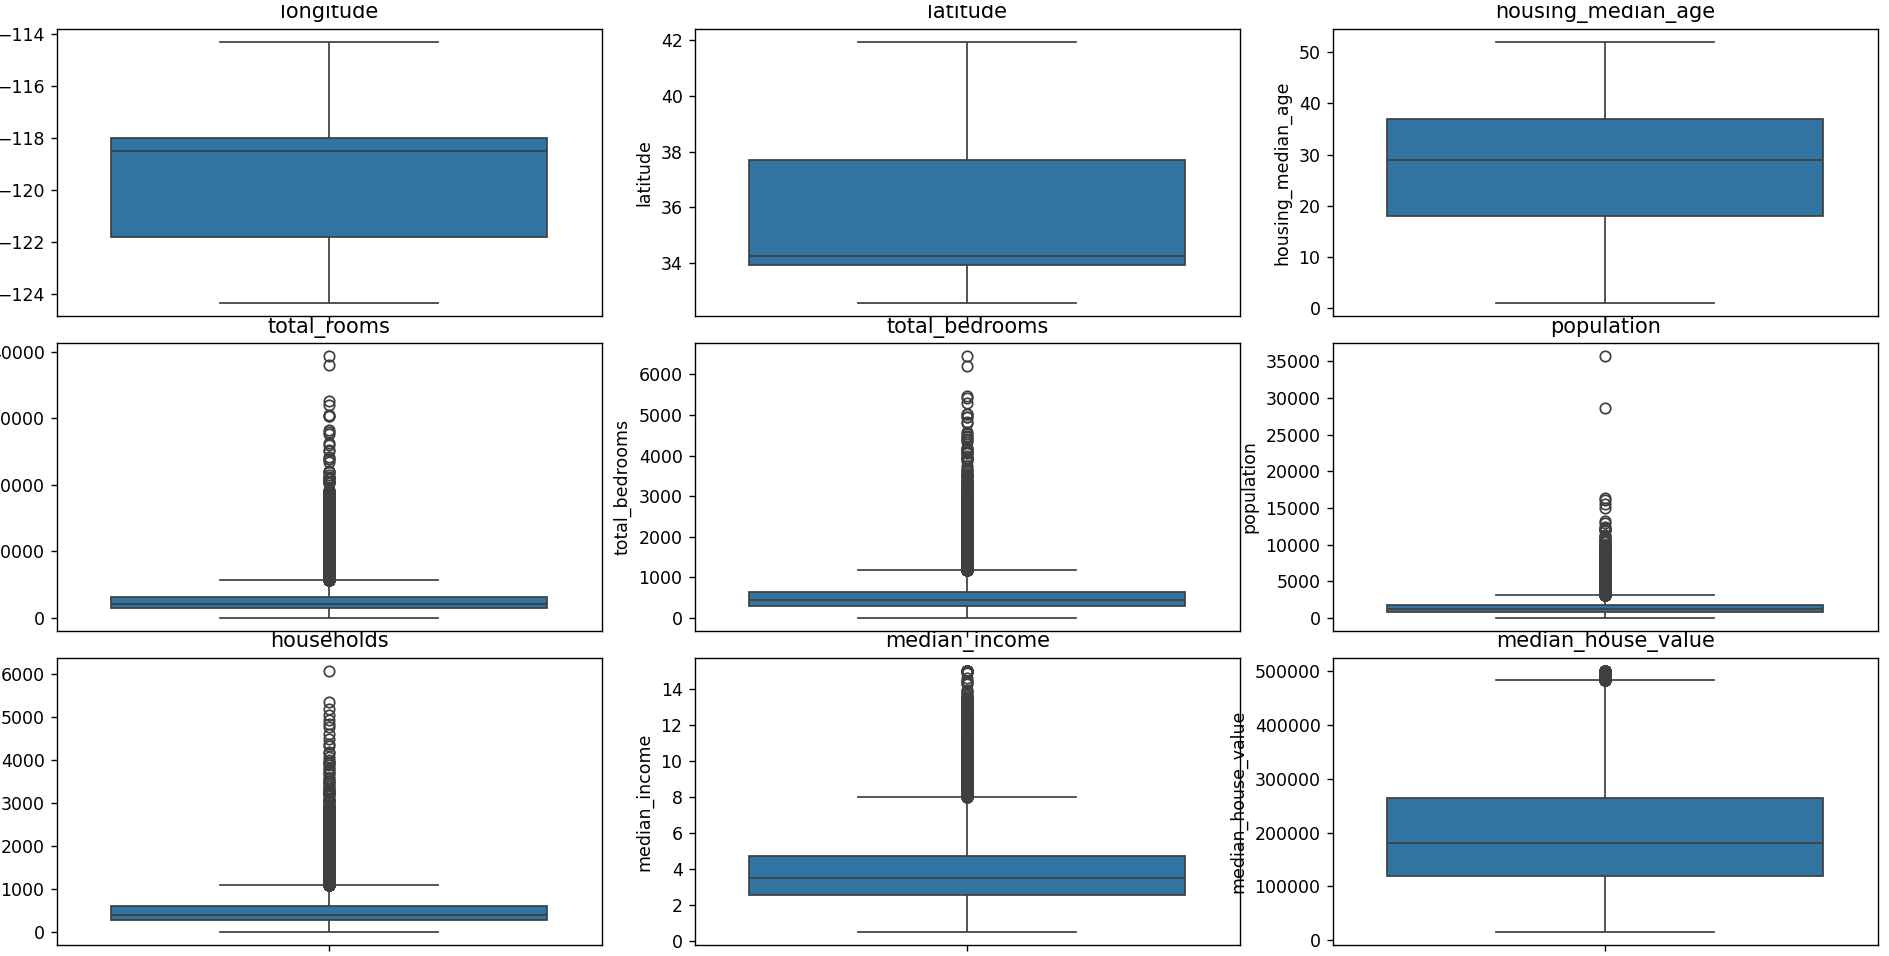

### Contagem das Categorias de Proximidade ao Oceano

Mostra a frequência de cada categoria na variável ocean_proximity.

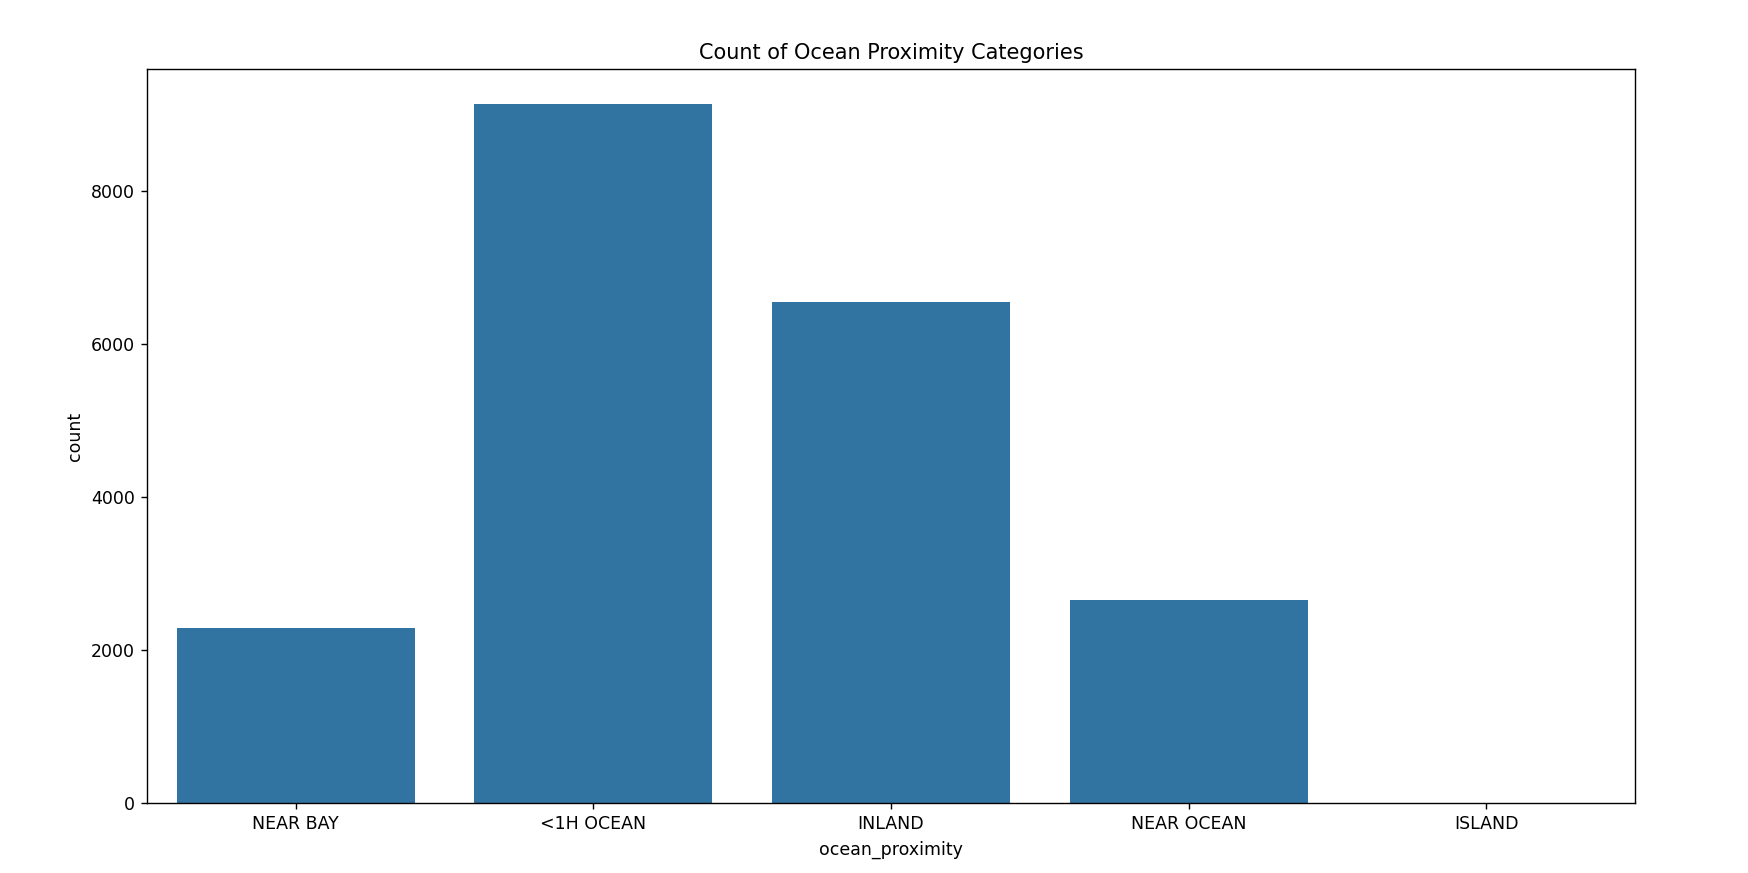

### Elbow Method para o optimal k 

Avalia o número ideal de clusters para o algoritmo K-Means utilizando a inércia.

### Análise de Silhueta para o optimal k

Mede o desempenho do clustering utilizando a pontuação de silhueta para diferentes valores de k.

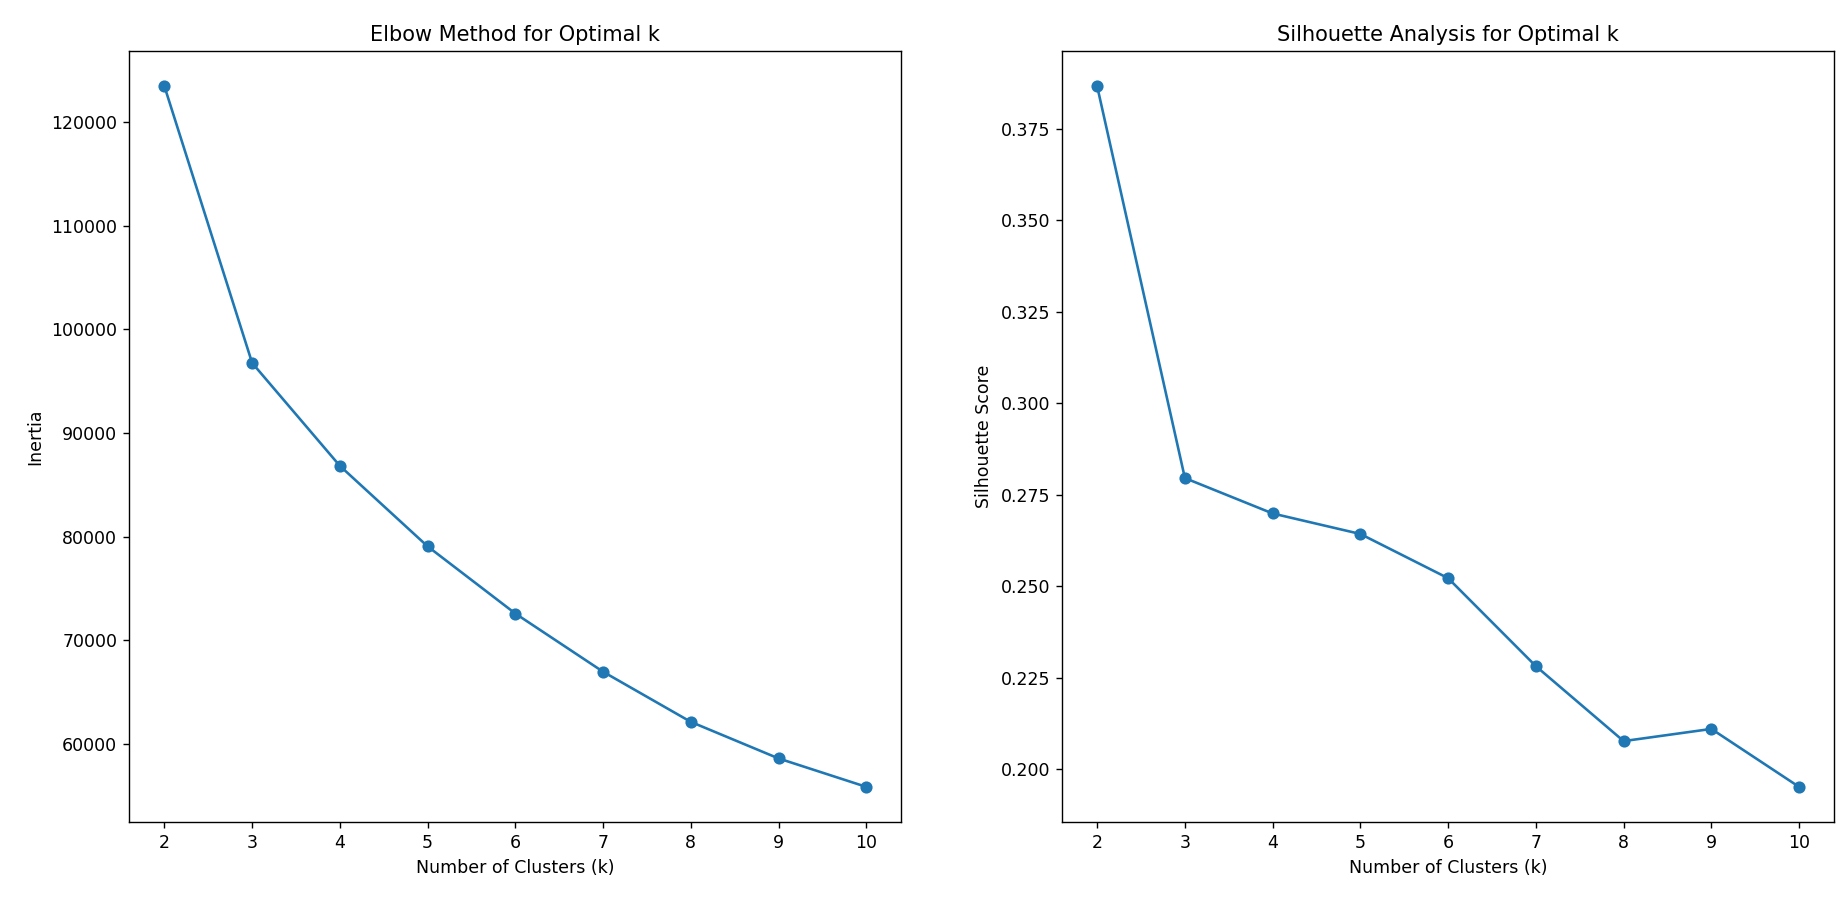

### Confusion Matrix
Avalia o desempenho do modelo de classificação comparando as classes previstas com as classes reais.

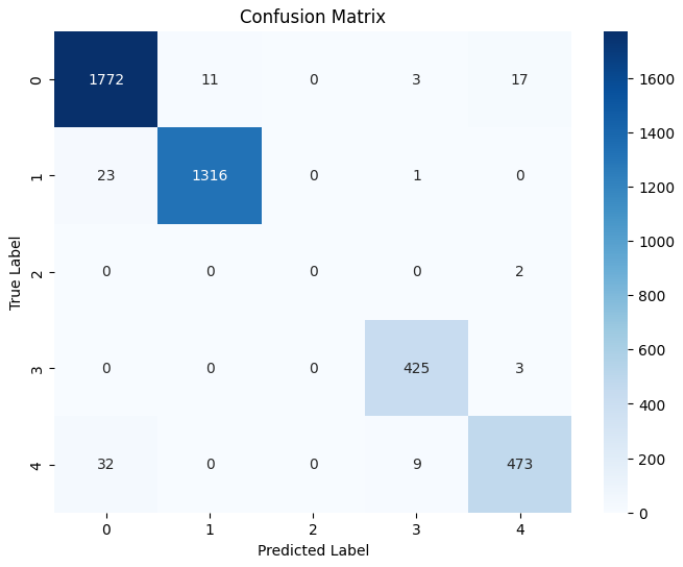

## Conclusão
Neste notebook, exploramos o dataset de habitação, aplicamos técnicas de regressão, clustering e data mining, gerando vários insights.
